In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise

### 1 Edge Detection

#### buildings.jpg
#### a) Sobel Kernel

In [2]:
img = cv2.imread('building.jpg', 0)
img.shape

(420, 560)

In [3]:
img_noise_removed = cv2.GaussianBlur(img, (3, 3), 1.5)

sobel_filter_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_filter_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])



In [4]:
def apply_sobel(img, sobel_filter_x, sobel_filter_y):
    sobel_filter_x = cv2.flip(sobel_filter_x, -1)
    sobel_filter_y = cv2.flip(sobel_filter_y, -1)
    
    sobel_x = cv2.filter2D(img, -1, sobel_filter_x)
    sobel_y = cv2.filter2D(img, -1, sobel_filter_y)
    
    res = (0.5* sobel_x) + (0.5*sobel_y)
    return res

In [5]:
sobel_img = apply_sobel(img, sobel_filter_x, sobel_filter_y)
sobel_img_noise_removed = apply_sobel(img_noise_removed, sobel_filter_x, sobel_filter_y)

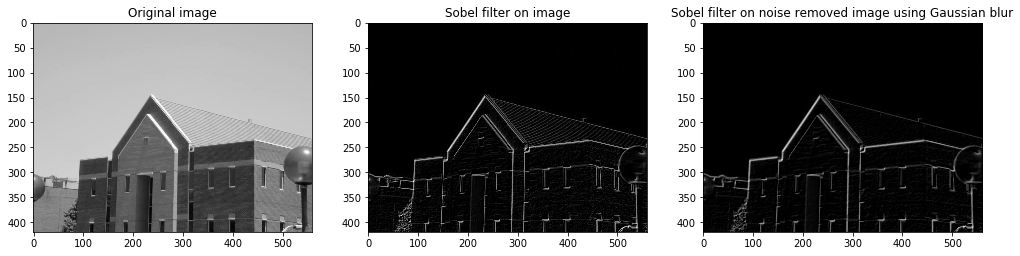

In [6]:
fig, axs = plt.subplots(1,3, figsize = (17,8))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(sobel_img, cmap = 'gray')
axs[1].set_title("Sobel filter on image")

axs[2].imshow(sobel_img_noise_removed, cmap = 'gray')
axs[2].set_title("Sobel filter on noise removed image using Gaussian blur")

plt.show()

In [7]:
def apply_threshold(img, threshold = 25):
    M,N = img.shape
    out = np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            if img[i,j]>threshold:
                out[i,j] = 255
                
    return out

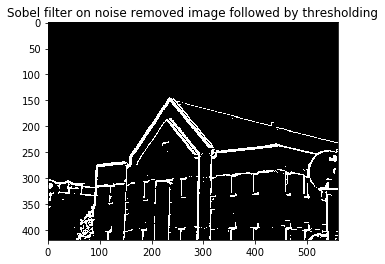

In [8]:
sobel_img_threshold = apply_threshold(sobel_img_noise_removed)

plt.imshow(sobel_img_threshold, cmap ='gray')
plt.title("Sobel filter on noise removed image followed by thresholding")
plt.show()

#### b) LoG

In [9]:
def LoG(img):
    img_denoised = cv2.GaussianBlur(img, (3, 3), 1.5)
    #img_denoised = img_denoised.astype(np.float64)
    res = cv2.Laplacian(img_denoised, cv2.CV_64F)
    return res

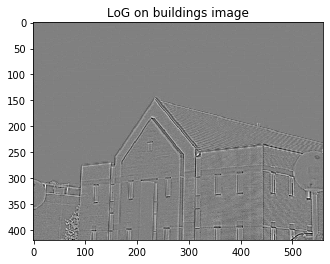

In [10]:
res = LoG(img)

plt.imshow(res, cmap ='gray')
plt.title("LoG on buildings image")
plt.show()

In [84]:
def ZeroCrossing(img):
    M,N = img.shape
    res = np.zeros((M,N))
    for i in range(M-1):
        for j in range(N-1):
            nbd = [img[i-1,j-1], img[i-1,j],img[i-1,j+1], img[i,j-1], img[i,j+1], img[i+1,j-1],img[i+1,j], img[i+1,j+1]]
            positive_count = 0
            negative_count = 0
            
            d = max(nbd)
            e = min(nbd)
            
            for nb in nbd:
                if nb>0:
                    positive_count+=1
                elif nb<0:
                    negative_count+=1
                    
            #zero crossing
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel
 
            if z_c:
                if img[i,j]>0:
                    res[i, j] = img[i,j] + np.abs(e)
                elif img[i,j]<0:
                    res[i, j] = np.abs(img[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    res_norm = res/res.max()*255
    res = np.uint8(res_norm)
 
    return res

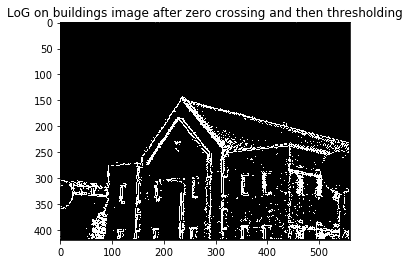

In [90]:
res = ZeroCrossing(res)
res = apply_threshold(res, threshold = 35)
plt.imshow(res, cmap ='gray')
plt.title("LoG on buildings image after zero crossing and then thresholding")
plt.show()

#### c) Canny Edge detection

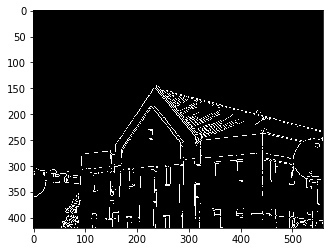

In [95]:
edges = cv2.Canny(img,50,200)
plt.imshow(edges, cmap = 'gray')
plt.show()

#### d) Hough transform

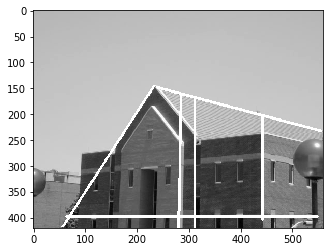

In [70]:
hough_img = cv2.imread('building.jpg', 0)
edges = cv2.Canny(hough_img,50,200)
lines = cv2.HoughLinesP(edges, 2, np.pi/180, threshold = 200, minLineLength=100, 
                        maxLineGap=150)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
plt.imshow(hough_img, cmap = 'gray')
plt.show()

In [ ]:
fig, axs = plt.subplots(1,5, figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[1].imshow()

### building.jpg

In [73]:
img = cv2.imread('building.jpg',0)

In [102]:
def sobel_edge_detector(img):
    img_noise_removed = cv2.GaussianBlur(img, (3, 3), 1.5)

    sobel_filter_x = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])

    sobel_filter_y = np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]])
    
    sobel_img = apply_sobel(img_noise_removed, sobel_filter_x, sobel_filter_y)
    
    sobel_img_threshold = apply_threshold(sobel_img)
    return sobel_img_threshold

def LoG_Edge_detector(img):
    res = LoG(img)
    res = ZeroCrossing(res)
    res = apply_threshold(res, threshold = 35)
    return res

def canny_Edge_detector(img, t1 = 50, t2  = 200):
    return cv2.Canny(img,t1,t2)

def Hough_Edge_detector(img, t1 = 50, t2 = 200):
    hough_img = img.copy()
    edges = cv2.Canny(hough_img,t1,t2)
    lines = cv2.HoughLinesP(edges, 2, np.pi/180, threshold = 200, minLineLength=100, 
                            maxLineGap=150)

    # Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(hough_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
    return hough_img

def Hough_Circle_detector(img):
    hough_img = img.copy()
    #img_blur = cv2.medianBlur(img, 5)
    img_blur = cv2.GaussianBlur(hough_img, (3, 3), 1.5)
    # Apply hough transform on the image
    circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=50, param2=30, minRadius=5, maxRadius=30)
    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw outer circle
            cv2.circle(hough_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw inner circle
            cv2.circle(hough_img, (i[0], i[1]), 2, (0, 0, 255), 3)
            
    return hough_img

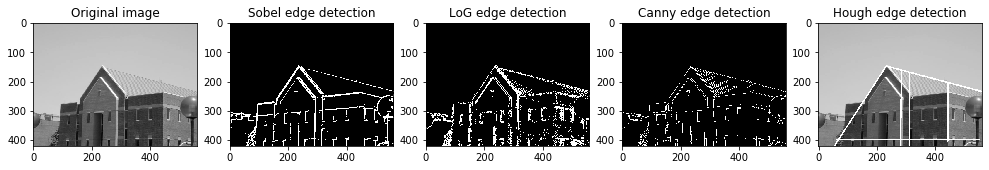

In [91]:
fig, axs = plt.subplots(1,5, figsize = (17,10))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(sobel_edge_detector(img), cmap = 'gray')
axs[1].set_title("Sobel edge detection")

axs[2].imshow(LoG_Edge_detector(img), cmap = 'gray')
axs[2].set_title("LoG edge detection")

axs[3].imshow(canny_Edge_detector(img), cmap = 'gray')
axs[3].set_title("Canny edge detection")

axs[4].imshow(Hough_Edge_detector(img), cmap = 'gray')
axs[4].set_title("Hough edge detection")

plt.show()

### objects.png

In [99]:
img = cv2.imread('objects.png',0)
img.shape

(418, 489)

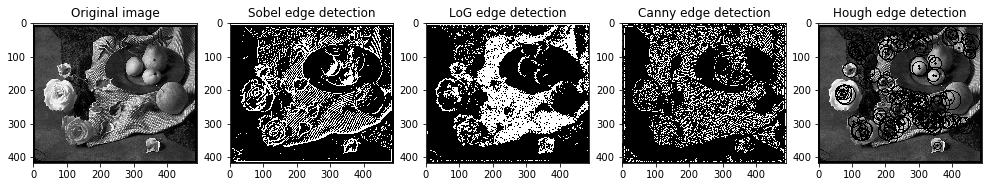

In [103]:
fig, axs = plt.subplots(1,5, figsize = (17,10))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(sobel_edge_detector(img), cmap = 'gray')
axs[1].set_title("Sobel edge detection")

axs[2].imshow(LoG_Edge_detector(img), cmap = 'gray')
axs[2].set_title("LoG edge detection")

axs[3].imshow(canny_Edge_detector(img), cmap = 'gray')
axs[3].set_title("Canny edge detection")

axs[4].imshow(Hough_Circle_detector(img), cmap = 'gray')
axs[4].set_title("Hough edge detection")

plt.show()

### 2) Image noising and denoising

#### a) Adding noise

In [26]:
img = cv2.imread('checkerboard.png',0)
img.shape

(200, 200)

In [77]:
def add_periodic_noise(img, A = 0.5, omega = np.pi/2):
    M,N = img.shape
    res = np.zeros((M,N), dtype = np.float64)
    #add noise Asin(omega*i) + Asin(omega*j) to img(i,j) 
    for i in range(M):
        for j in range(N):
            res[i,j] = img[i,j] + A*np.sin(omega*i) + A*np.sin(omega*j)
            
    return res.astype(np.uint8)

In [78]:
# adding gaussian noise
gaussian_noisy_img = random_noise(img, mode = 'gaussian')

# adding salt and pepper noise
salt_pepper_img = random_noise(img, mode = 's&p')

# add periodic noise
periodic_noisy_img = add_periodic_noise(img)

In [79]:
gaussian_noisy_img = gaussian_noisy_img * 255.0
gaussian_noisy_img = gaussian_noisy_img.astype(np.uint8)

salt_pepper_img = salt_pepper_img * 255.0
salt_pepper_img = salt_pepper_img.astype(np.uint8)

# periodic_noisy_img = periodic_noisy_img * 255.0 
# periodic_noisy_img = periodic_noisy_img.astype(np.uint8)

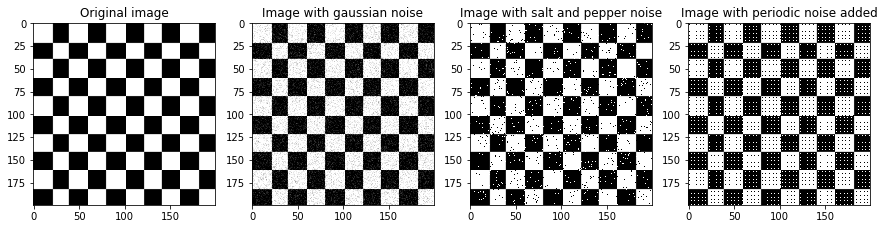

In [80]:
fig, axs = plt.subplots(1,4, figsize = (15,6))
axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(gaussian_noisy_img, cmap = 'gray')
axs[1].set_title("Image with gaussian noise")

axs[2].imshow(salt_pepper_img, cmap = 'gray')
axs[2].set_title("Image with salt and pepper noise")

axs[3].imshow(periodic_noisy_img, cmap = 'gray')
axs[3].set_title("Image with periodic noise added")

plt.show()

#### b) Image denoising

In [81]:
gaussian_denoise_gn = cv2.GaussianBlur(gaussian_noisy_img, (5,5), 1.5)
gaussian_denoise_spn = cv2.GaussianBlur(salt_pepper_img, (5,5), 1.5)
gaussian_denoise_pn = cv2.GaussianBlur(periodic_noisy_img, (5,5), 1.5)

In [82]:
median_denoise_gn  = cv2.medianBlur(gaussian_noisy_img, 5)
median_denoise_spn = cv2.medianBlur(salt_pepper_img, 5)
median_denoise_pn = cv2.medianBlur(periodic_noisy_img, 5)

**Comparison of denoising of the Gaussian noisy image** 

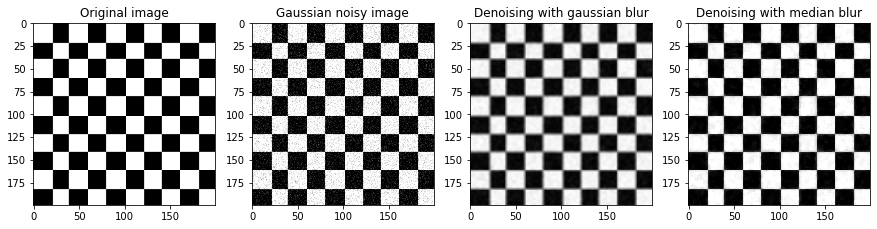

In [83]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(gaussian_noisy_img, cmap = 'gray')
axs[1].set_title("Gaussian noisy image")

axs[2].imshow(gaussian_denoise_gn, cmap = 'gray')
axs[2].set_title("Denoising with gaussian blur")

axs[3].imshow(median_denoise_gn, cmap = 'gray')
axs[3].set_title("Denoising with median blur")

plt.show()

**Comparison of denoising of the salt and pepper noisy image** 

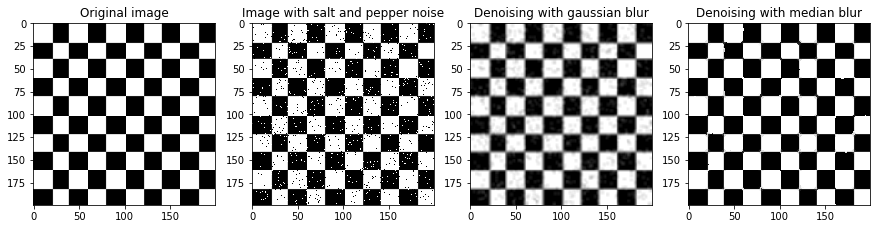

In [84]:
fig, axs = plt.subplots(1,4, figsize = (15,6))

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(salt_pepper_img, cmap = 'gray')
axs[1].set_title("Image with salt and pepper noise")

axs[2].imshow(gaussian_denoise_spn, cmap = 'gray')
axs[2].set_title("Denoising with gaussian blur")

axs[3].imshow(median_denoise_spn, cmap = 'gray')
axs[3].set_title("Denoising with median blur")

plt.show()

### 3) Threshold comparison

#### a) Global thresholding

In [85]:
fp1 = cv2.imread('fingerprint1.jpg',0)
fp2 = cv2.imread('fingerprint2.jpg',0)
bp = cv2.imread('bookpage.jpg',0)

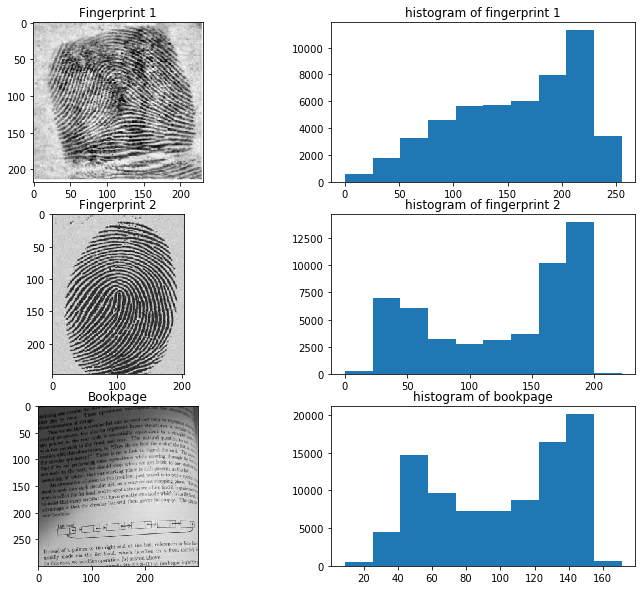

In [90]:
fig, axs = plt.subplots(3,2, figsize = (12,10))

axs[0,0].imshow(fp1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")

axs[0,1].hist(fp1.ravel())
axs[0,1].set_title("histogram of fingerprint 1")

axs[1,0].imshow(fp2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")

axs[1,1].hist(fp2.ravel())
axs[1,1].set_title("histogram of fingerprint 2")

axs[2,0].imshow(bp, cmap = 'gray')
axs[2,0].set_title("Bookpage")

axs[2,1].hist(bp.ravel())
axs[2,1].set_title("histogram of bookpage")

plt.show()

From  the histogram of these images the threshold values of 150, 100 and 90 are selected respectively for the images fingerprint1, fingerprint2 and bookpage respectively.

In [91]:
threshold_fp1 = 150
threshold_fp2 = 100
threshold_bp = 90



In [93]:
ret,thresh_fp1 = cv2.threshold(fp1,threshold_fp1,255,cv2.THRESH_BINARY)
ret, thresh_fp2 = cv2.threshold(fp2,threshold_fp2,255,cv2.THRESH_BINARY)
ret, thresh_bp = cv2.threshold(bp,threshold_bp,255,cv2.THRESH_BINARY)

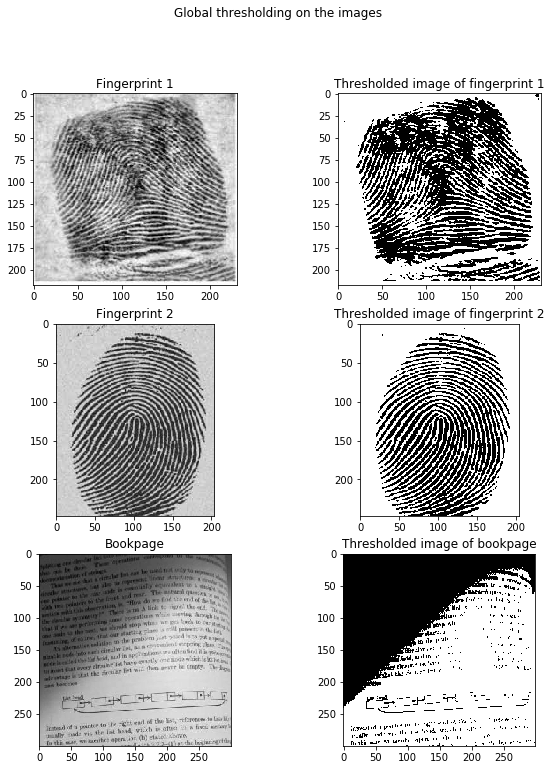

In [95]:
fig, axs = plt.subplots(3,2, figsize = (10,12))

axs[0,0].imshow(fp1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")

axs[0,1].imshow(thresh_fp1, cmap = 'gray')
axs[0,1].set_title("Thresholded image of fingerprint 1")

axs[1,0].imshow(fp2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")

axs[1,1].imshow(thresh_fp2, cmap = 'gray')
axs[1,1].set_title("Thresholded image of fingerprint 2")

axs[2,0].imshow(bp, cmap = 'gray')
axs[2,0].set_title("Bookpage")

axs[2,1].imshow(thresh_bp, cmap = 'gray')
axs[2,1].set_title("Thresholded image of bookpage")

plt.suptitle("Global thresholding on the images")
plt.show()

#### b) Otsu's method

In [107]:
ret_fp1,thresh_fp1 = cv2.threshold(fp1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_fp2, thresh_fp2 = cv2.threshold(fp2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_bp, thresh_bp = cv2.threshold(bp,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) 

# thresholds calculated by Otsu's method for the images fp1, fp2 and bp:
ret_fp1, ret_fp2, ret_bp

(149.0, 113.0, 95.0)

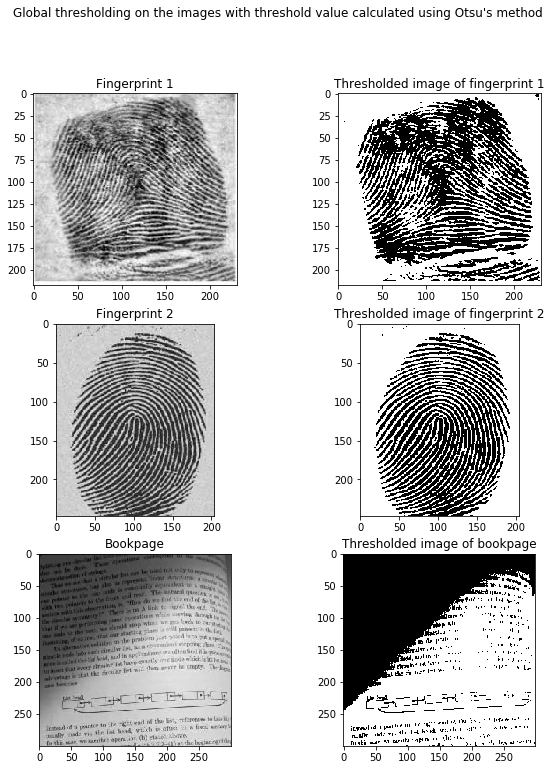

In [108]:
fig, axs = plt.subplots(3,2, figsize = (10,12))

axs[0,0].imshow(fp1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")

axs[0,1].imshow(thresh_fp1, cmap = 'gray')
axs[0,1].set_title("Thresholded image of fingerprint 1")

axs[1,0].imshow(fp2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")

axs[1,1].imshow(thresh_fp2, cmap = 'gray')
axs[1,1].set_title("Thresholded image of fingerprint 2")

axs[2,0].imshow(bp, cmap = 'gray')
axs[2,0].set_title("Bookpage")

axs[2,1].imshow(thresh_bp, cmap = 'gray')
axs[2,1].set_title("Thresholded image of bookpage")

plt.suptitle("Global thresholding on the images with threshold value calculated using Otsu's method")
plt.show()

#### c) Adaptive Thresholding

In [104]:
thresh_fp1_mean = cv2.adaptiveThreshold(fp1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh_fp2_mean = cv2.adaptiveThreshold(fp2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh_bp_mean = cv2.adaptiveThreshold(bp,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_fp1_gaussian = cv2.adaptiveThreshold(fp1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
thresh_fp2_gaussian = cv2.adaptiveThreshold(fp2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
thresh_bp_gaussian = cv2.adaptiveThreshold(bp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

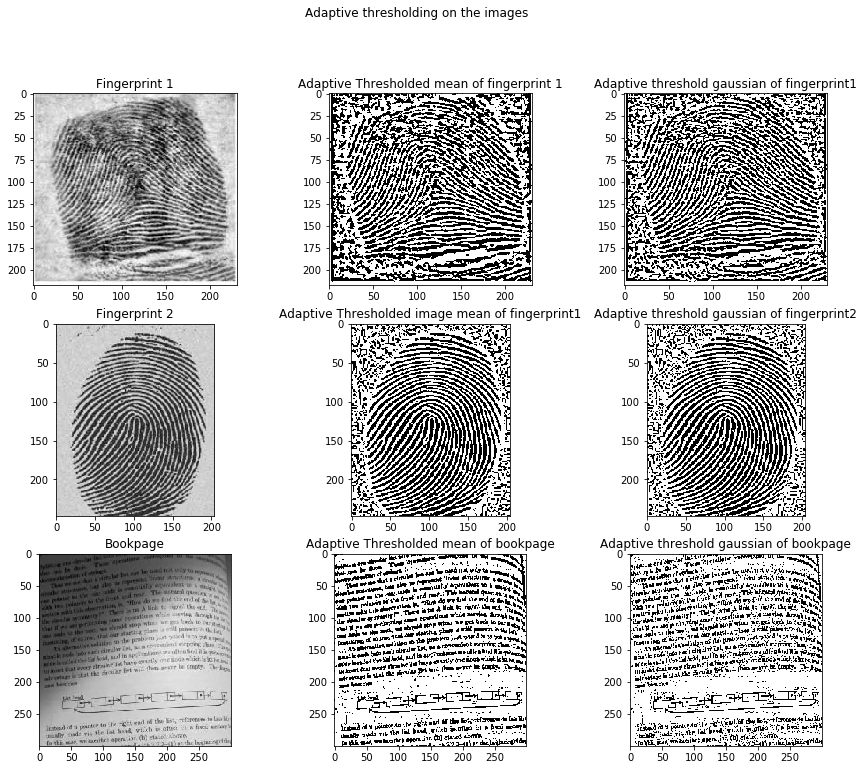

In [105]:
fig, axs = plt.subplots(3,3, figsize = (15,12))

axs[0,0].imshow(fp1, cmap = 'gray')
axs[0,0].set_title("Fingerprint 1")

axs[0,1].imshow(thresh_fp1_mean, cmap = 'gray')
axs[0,1].set_title("Adaptive Thresholded mean of fingerprint 1")

axs[0,2].imshow(thresh_fp1_gaussian, cmap ='gray')
axs[0,2].set_title("Adaptive threshold gaussian of fingerprint1")

axs[1,0].imshow(fp2, cmap = 'gray')
axs[1,0].set_title("Fingerprint 2")

axs[1,1].imshow(thresh_fp2_mean, cmap = 'gray')
axs[1,1].set_title("Adaptive Thresholded image mean of fingerprint1")

axs[1,2].imshow(thresh_fp2_gaussian, cmap ='gray')
axs[1,2].set_title("Adaptive threshold gaussian of fingerprint2")

axs[2,0].imshow(bp, cmap = 'gray')
axs[2,0].set_title("Bookpage")

axs[2,1].imshow(thresh_bp_mean, cmap = 'gray')
axs[2,1].set_title("Adaptive Thresholded mean of bookpage")

axs[2,2].imshow(thresh_bp_gaussian, cmap ='gray')
axs[2,2].set_title("Adaptive threshold gaussian of bookpage")

plt.suptitle("Adaptive thresholding on the images")
plt.show()